<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Remove-and-clean-data" data-toc-modified-id="Remove-and-clean-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Remove and clean data</a></span><ul class="toc-item"><li><span><a href="#Look-for-null-values" data-toc-modified-id="Look-for-null-values-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Look for null values</a></span></li><li><span><a href="#Exploring-the-PDFs-(Probability-Density-Functions)" data-toc-modified-id="Exploring-the-PDFs-(Probability-Density-Functions)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploring the PDFs (Probability Density Functions)</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Outliers</a></span></li></ul></li><li><span><a href="#Cleaned-data" data-toc-modified-id="Cleaned-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaned data</a></span></li><li><span><a href="#Reset-index" data-toc-modified-id="Reset-index-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reset index</a></span></li><li><span><a href="#Checking-the-OLS-assumptions" data-toc-modified-id="Checking-the-OLS-assumptions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Checking the OLS assumptions</a></span></li><li><span><a href="#Relaxing-assumptions" data-toc-modified-id="Relaxing-assumptions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Relaxing assumptions</a></span></li><li><span><a href="#Create-Dummy-variables" data-toc-modified-id="Create-Dummy-variables-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create Dummy variables</a></span></li><li><span><a href="#Reorder-the-columns" data-toc-modified-id="Reorder-the-columns-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Reorder the columns</a></span></li><li><span><a href="#Declare-the-targets-and-inputs" data-toc-modified-id="Declare-the-targets-and-inputs-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Declare the targets and inputs</a></span></li><li><span><a href="#Scale-the-data" data-toc-modified-id="Scale-the-data-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Scale the data</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Create-Regression" data-toc-modified-id="Create-Regression-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Create Regression</a></span><ul class="toc-item"><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Train the model</a></span></li><li><span><a href="#Weights-and-Biases" data-toc-modified-id="Weights-and-Biases-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Weights and Biases</a></span></li><li><span><a href="#Testing-the-model" data-toc-modified-id="Testing-the-model-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Testing the model</a></span></li><li><span><a href="#Test-model-with-new-data" data-toc-modified-id="Test-model-with-new-data-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Test model with new data</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('Car Prices.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Remove and clean data

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
#dropped model due to too many unique variables
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Look for null values
Look for null values and remove if null values in rows if it is less than %5.

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_nv = data.dropna(axis=0)

In [7]:
data_no_nv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs (Probability Density Functions)


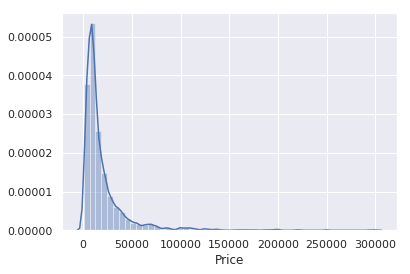

In [8]:
sns.distplot(data_no_nv['Price'])

### Outliers
Plot above shows a number of outliers to the left of the graph which will be a problem to your regression. To deal with outliers less than 1% we use the DataFrame.quantile() method


In [9]:
q = data_no_nv['Price'].quantile(0.90)
data1 = data_no_nv[data_no_nv['Price']<q]

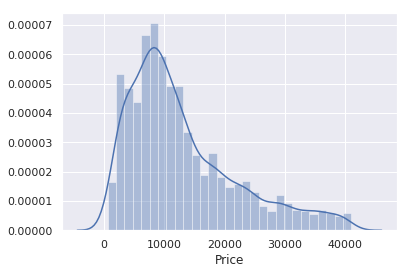

In [10]:
sns.distplot(data1['Price'])

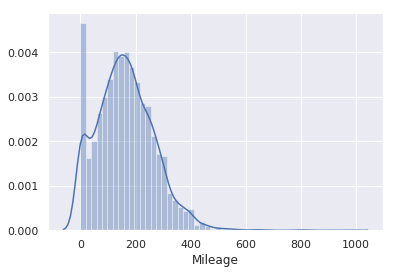

In [11]:
sns.distplot(data_no_nv['Mileage'])

In [12]:
q = data1['Mileage'].quantile(0.99)
data2 = data1[data1['Mileage']<q]

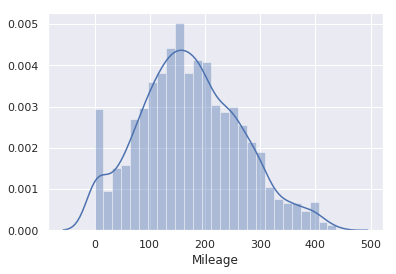

In [13]:
sns.distplot(data2['Mileage'])

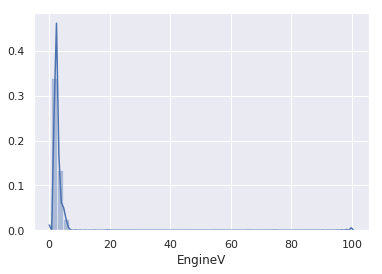

In [14]:
sns.distplot(data_no_nv['EngineV'])

In [15]:
EngV = pd.DataFrame(raw_data['EngineV'])
EngV =EngV.dropna(axis=0)
EngV.sort_values(by='EngineV').tail()

,EngineV
1311,99.99
3114,99.99
1264,99.99
3641,99.99
256,99.99


Results above show invalid entries for the engine size such as 99.99 which must be removed as there are no engine size of 99.99. Entries are probably user data entry errors.

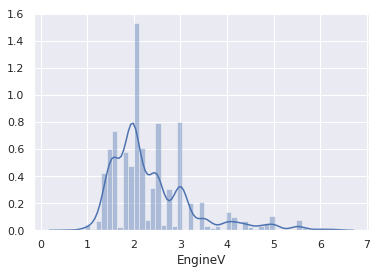

In [16]:
data3 = data2[data2['EngineV']<6.5]
sns.distplot(data3['EngineV'])

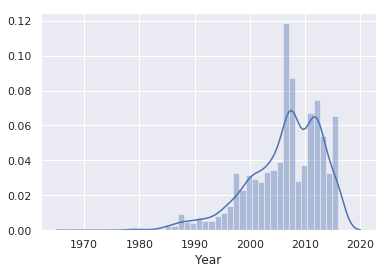

In [17]:
sns.distplot(data_no_nv['Year'])

Year outlier is on the right side which is on the low end so instead of 
getting the 99th percentile get the newest model which is the top 1 percentile


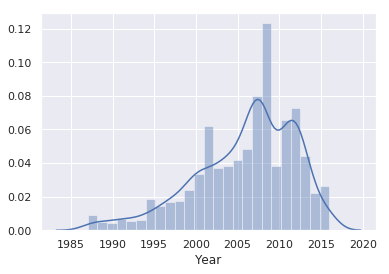

In [18]:
q = data3['Year'].quantile(0.01)
data4 = data3[data3['Year']>q]
sns.distplot(data4['Year'])

In [19]:
data_cleaned = data4

## Cleaned data

In [20]:
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


## Reset index

In [21]:
data_cleaned.reset_index(drop=True).head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [22]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3526,3526.000000,3526,3526.000000,3526.000000,3526,3526,3526.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,823,NaN,1393,NaN,NaN,1564,3164,NaN
mean,NaN,13150.859305,NaN,173.325581,2.360777,NaN,NaN,2005.884855
std,NaN,9016.444257,NaN,91.199599,0.887299,NaN,NaN,6.048721
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1987.000000
25%,NaN,6800.000000,NaN,110.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10500.000000,NaN,168.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,17800.000000,NaN,235.000000,2.700000,NaN,NaN,2011.000000


## Checking the OLS assumptions

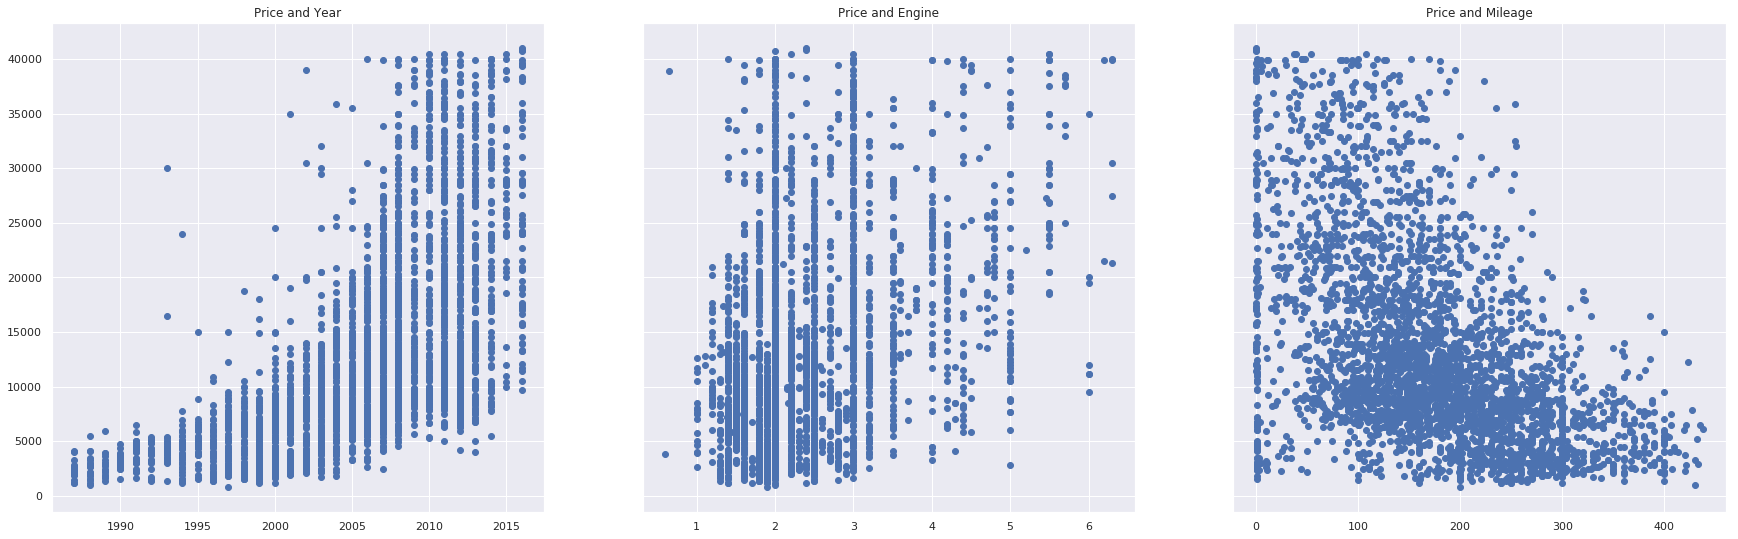

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(30,9))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and Engine')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

## Relaxing assumptions 
Reviewing the 5 assumptions **a)** Linearity (which is the first thing we will do), **b)** No Endogeniety, **c)** Normality & Homoscedasticity, **d)** No Autocorrelation **E)** Multicollinearity

**A) Linearity**
Use the log method for **Price** and drop the column.

In [24]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


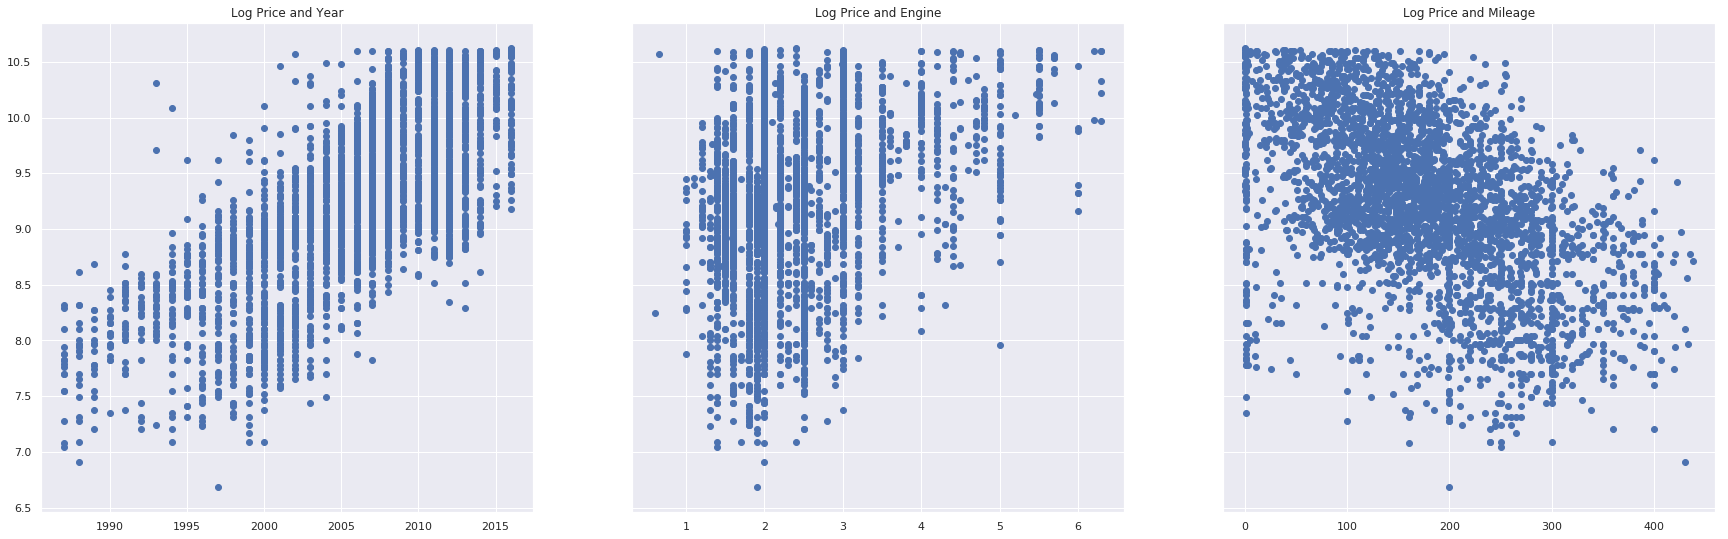

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(30,9))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and Engine')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

Drop Price since it is no longer needed

In [26]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

**B)  No Endogeniety** - Assumptions are not violated
**C) Normality & Homoscedasticity** - Normality is assumed for big samples. The zero mean is addressed by the inclussion of the intercept in the regression. Homoscedasticity currently holds as shown in the graphs, the reason for that is because of the log transformation which is the common fix for homoscedasticity.
**D) No Autocorrelation** - No need since this is not a time series data.

**E) Multicollinearity**
Use statsmodels to check for Multicollinearity through VIF (Variance inflation factor)

In [27]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"] = variables.columns


In [29]:
vif

,VIF,features
0,4.653066,Mileage
1,10.520771,Year
2,8.197901,EngineV


VIF = 1 means no multicollinearity, 1 - 5 is ideal, 6-10 unacceptable. But there's no standard and some accepts up to 6-7. In this example Year seems to be to corellated so we remove year.

In [30]:
data_no_multicollinearity = data_cleaned
#.drop('Year',axis=1) # added year to see if it will improve the model
data_no_multicollinearity = data_cleaned.drop(['EngineV'],axis=1)

## Create Dummy variables
Create dummy variables for categorical variables and drop first variable.

In [31]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [32]:
data_with_dummies.head()

,Mileage,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Reorder the columns
Reorder columns so that the dependent variable columns are first ones in the data frame 

In [33]:
data_with_dummies.columns.values

array(['Mileage', 'Year', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes'], dtype=object)

In [34]:
cols =['log_price', 'Mileage', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [35]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Declare the targets and inputs

In [36]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

## Scale the data

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
inputs_scaled = scaler.transform(inputs)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


## Train Test Split
x = inputs_scaled, y = targets

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

## Create Regression
This is actually a log linear regression since we used log for the price

### Train the model

In [40]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

To check the final result, plot the predicted(reg.predict(x_train)) values against the observed(observed values are the targets) values

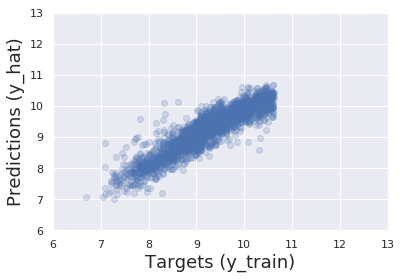

In [41]:
y_hat = reg.predict(x_train)
plt.scatter(y_train,y_hat, alpha=0.2)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


Another way to check is residual plot = Difference between the targets and the predictions

Text(0.5, 1.0, 'Residual PDF')

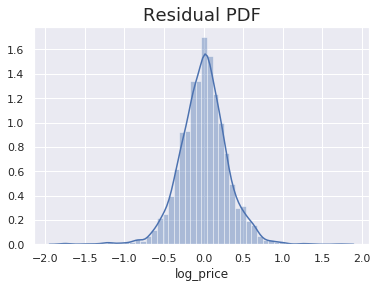

In [42]:
sns.distplot(y_train-y_hat)
plt.title('Residual PDF',size=18)

In [43]:
reg.score(x_train,y_train)

0.8322040067371471

The R2 shows we are explaining 75% of the variability of the data

### Weights and Biases
A positive weight shows as the feature increases in value, so does the dependent variable(log_price)
A negative  shows as the feature increases in value, the dependent variable(log_price) decreases


In [44]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.032968
1,Year,0.477330
2,Brand_BMW,0.023568
3,Brand_Mercedes-Benz,0.002525
4,Brand_Mitsubishi,-0.158319
5,Brand_Renault,-0.238713
6,Brand_Toyota,-0.066346
7,Brand_Volkswagen,-0.133100
8,Body_hatch,-0.168394
9,Body_other,-0.104540


### Testing the model

In [45]:
y_hat_test = reg.predict(x_test)

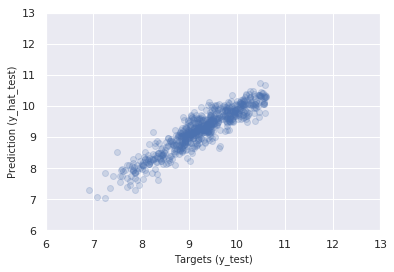

In [46]:
plt.scatter(y_test,y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=10)
plt.ylabel('Prediction (y_hat_test)',size=10)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [47]:
#np.exp is the inverse of log. Since price was log, the price_log must be reversed to get the actual price.
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,6176.208724
1,11729.399965
2,7686.237983
3,22841.752388
4,10573.914274


In [48]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()
#It produces Nan values since y_test preserved it's index when it was shuffled

,Prediction,Target
0,6176.208724,NaN
1,11729.399965,NaN
2,7686.237983,NaN
3,22841.752388,NaN
4,10573.914274,NaN


In [49]:
y_test.head()

3122     8.556414
179      8.987197
2183     8.839277
983     10.126591
1667     9.200290
Name: log_price, dtype: float64

In [50]:
#To fix the Nan values, y_test index must be reset
y_test = y_test.reset_index(drop=True)
y_test.head()

0     8.556414
1     8.987197
2     8.839277
3    10.126591
4     9.200290
Name: log_price, dtype: float64

In [51]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,6176.208724,5200.0
1,11729.399965,8000.0
2,7686.237983,6900.0
3,22841.752388,24999.0
4,10573.914274,9900.0


In [52]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Differences%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
pd.set_option('display.float_format',lambda x: '%.2f' % x)
df_pf.sort_values(by=['Differences%']).tail()

,Prediction,Target,Residual,Differences%
193,24928.65,12250.00,-12678.65,103.50
414,21558.22,10493.00,-11065.22,105.45
402,15484.28,7200.00,-8284.28,115.06
192,9475.53,3800.00,-5675.53,149.36
445,5041.53,1800.00,-3241.53,180.09


In [53]:
df_pf.describe()

,Prediction,Target,Residual,Differences%
count,706.00,706.00,706.00,706.00
mean,12610.25,13148.33,538.08,21.87
std,7598.79,8923.67,4170.83,20.13
min,1133.64,999.00,-12678.65,0.01
25%,6812.29,6999.25,-1384.85,7.74
50%,11036.66,10500.00,32.08,16.79
75%,16692.23,17999.75,1847.57,30.84
max,46682.07,40800.00,21960.86,180.09


### Test model with new data 

In [56]:
new_data = pd.DataFrame(data=[[120,2019,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1]],columns=inputs.columns.values)
new_data

,Mileage,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,120,2019,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1


In [57]:
reg.predict(new_data)
new_data_scaled = scaler.transform(new_data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [58]:
new_data_scaled

array([[-0.58479582,  2.16855853,  2.42903184, -0.46821517, -0.30605956,
        -0.37514151, -0.38491585, -0.5517939 , -0.27920926, -0.32667551,
        -0.80812796, -0.34291562,  2.24447571,  2.27014926, -0.16639928,
        -0.76141257,  0.33824863]])

In [59]:
np.exp(reg.predict(new_data_scaled))

array([35558.12926984])